# Проверка распределений на нормальность

Проверка распределения случайной величины на нормальность (или на схождение с другим теоретическим распределением) необходимая процедура для вывода о том какой статистический тест применять. Критерием нормальности случайной величины является возможность применение t-тестов Сьюдента для двух величин, а также критерия Фишера для проверки равенства дисперсий

Тесты на нормальность делятся на графические и параметрические и непараметрические

Примером графического теста является анализ графика квантиль-квантиль, а аналитические методы представлены тестами Шапиро-Уилка, Колмогорова-Смирнова, Андерсона-Дарлинга и многими другими

# QQ Plot

Одним из простых и мощных способов оценить степень приблежения/отклонения рассматриваемого расспределения от теоретического - построить квантиль-квантиль график. \
Преимущества:
- простота
- относительная независимость от размеры выборки

Недостатки:
- невозможно численно оценить степень различия распределений
- требует некоторых навыков интерпретации

Алгоритм построения квантиль-квантиль графика

In [10]:
import math
from scipy import stats
import numpy as np
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import matplotlib.animation as animation
import os

rcParams['figure.figsize'] = 10, 6
PATH = "/Users/daria/stepikcourse/"

In [3]:
# зададим исследуемое распределение 
nor_dist_1 = stats.norm.rvs(loc=5, scale=2, size=10000) 

# зададим теоретическое распределение схожесть с которым нужно определить (как правило нормальное нормированное)
nor_dist_2 = stats.norm.rvs(loc=0, scale=1, size=10000)


(-5.0, 5.0)

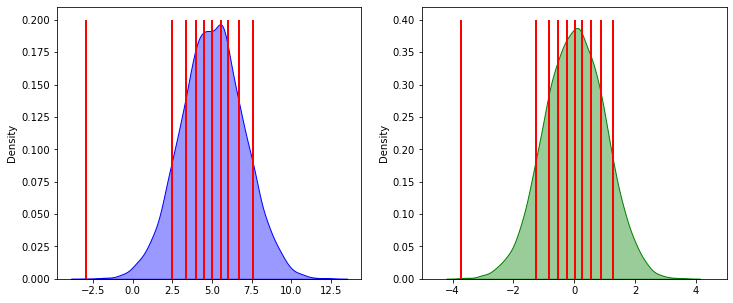

In [7]:
# отсортируем и поделим массивы на равные части (квантили)
def quntdivide(distrib, step): # функция определения значений квантиль с заданным шагом
    distrib.sort()
    
    return distrib[::step] # функция возвращает значения квантилей

n = 1000 # зададим шаг, учитывая размер выборок в 10 000 элементов шаг в 1000 шт. даст 10 значений квантилей
quanteordist = quntdivide(nor_dist_2, n)
quanunknowdist = quntdivide(nor_dist_1, n)

# визуализируем графики и нанесем на них квантили
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.kdeplot(nor_dist_1, shade=True, color="b", label="", alpha=.4, ax=ax[0])
sns.kdeplot(nor_dist_2, shade=True, color="g", label="", alpha=.4, ax=ax[1])

for i in quanunknowdist:
    ax[0].vlines(i, 0, 0.2, color='r', lw=2)
    
for i in quanteordist:
    ax[1].vlines(i, 0, 0.4, color='r', lw=2)
    
ax[1].set_xlim(-5, 5)

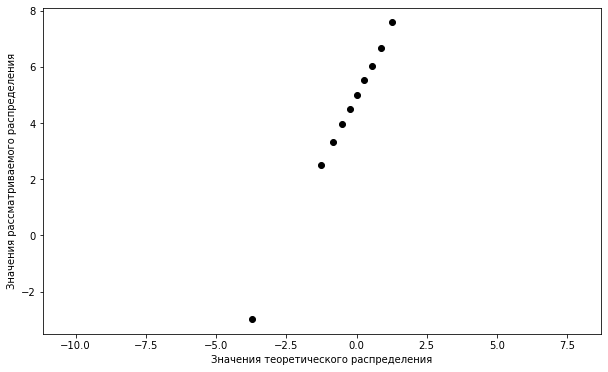

In [8]:
# построим график соответствия значений квантилей рассматриваемого распредления с теоретическим
x = quanteordist
y = quanunknowdist
plt.xlabel('Значения теоретического распределения', fontsize=10, color='black')
plt.ylabel('Значения рассматриваемого распределения', fontsize=10, color='black')
plt.axis('equal')

plt.plot(x, y, 'o', color='black');

# поскольку в данном примере мы рассматриваем схожесть нормального распределния с нормальным график qq примет форму прямой линии
# угол которой равен отношению стандартных отклонений теоретического и рассматриваемого распределения в данном случае 1/2 = 27 градусов

Ниже представлен код построения графика q-q сравнения лонгнормального распределения с нормальным. График оформлен в гифку с 8 итерациями построения. GIF файл сохраняется в папку расположения данного файла

MovieWriter imagemagick unavailable; using Pillow instead.


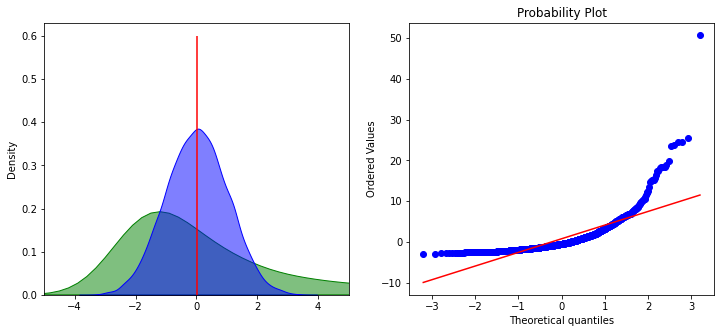

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

def animate(i): 

    for ax in axes:
        ax.clear()
        
    lognorm_values = stats.lognorm.rvs(s=i , scale=math.exp(1), size=1000) - 3
    n_dis = stats.norm.rvs(loc=0, scale=1, size=10000)

    sns.kdeplot(lognorm_values, shade=True, color="green", label="C", alpha=.5, ax=axes[0])
    sns.kdeplot(n_dis, shade=True, color="blue", label="C", alpha=.5, ax=axes[0])
    stats.probplot(lognorm_values, dist="norm", plot=plt)
    axes[0].set_xlim(-5, 5)
    axes[0].vlines(np.mean(n_dis), 0, 0.6, color='r')
    
    return axes
    
dist_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0.1, 1, 0.1),
                                      interval = 200,
                                      repeat = False)

dist_animation.save('qqplot.gif',
                 writer='imagemagick', 
                 fps=1)